In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [22]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [23]:
df.shape

(200, 5)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

**doing clustering on the basis of annual income and spending score**

In [26]:
X = df.iloc[:, [3,4]].values

In [27]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

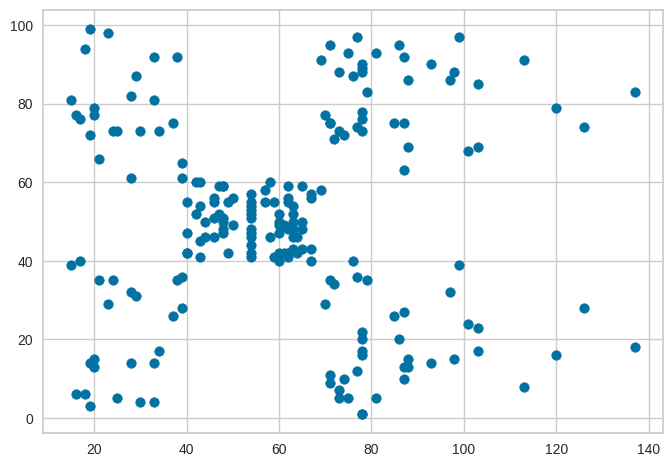

In [28]:
plt.scatter(X[:,0], X[:, 1])

**WCSS stands for: Within Clusters Sum of Square**

In [29]:
wcss=[]

for k in range (1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [30]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30227.606513152008,
 24986.52564064288,
 21797.08494464637,
 20080.72737314867]

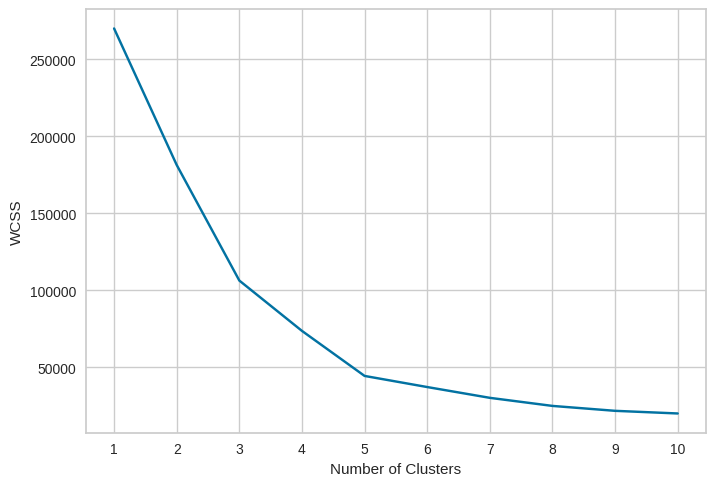

In [31]:
## plot elbow curve
plt.plot(range (1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

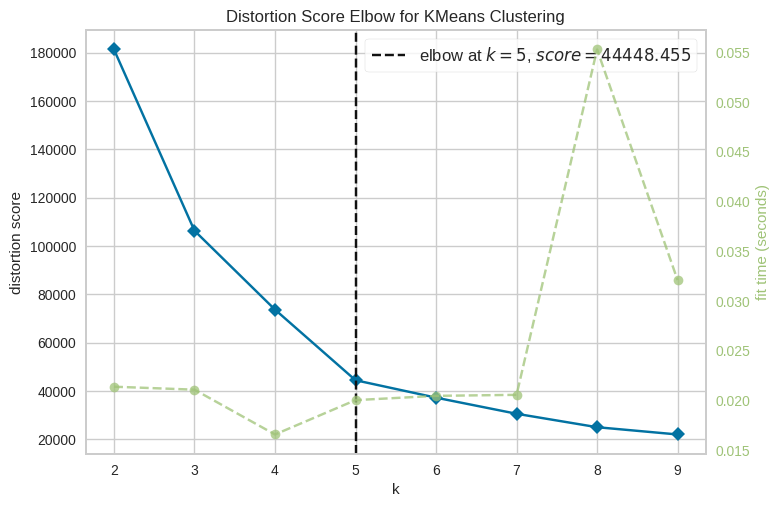

In [32]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

**Another way to choose the best number of clusters is to plot the silhuette score in a function of number of clusters. Let's see the results.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

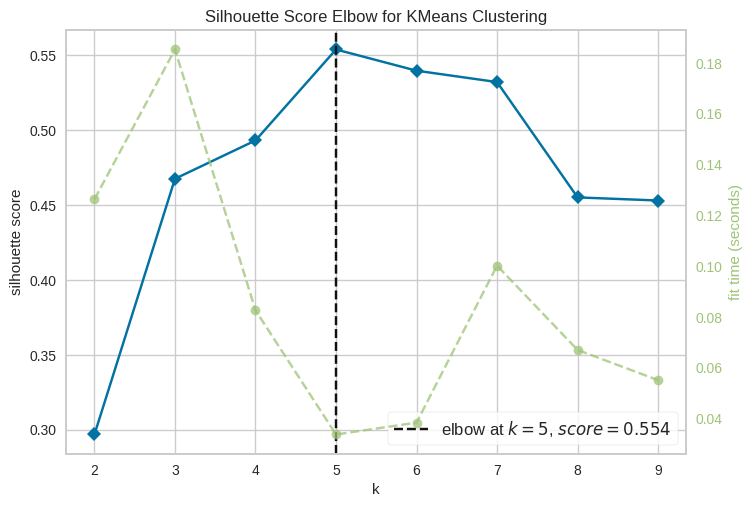

In [33]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X)
visualizer.show()
plt.show()

# **for complex scenarios we can use automated way to find the K**

In [34]:
!pip install kneed

In [35]:
from kneed import KneeLocator
# curve = convex/concave,   direction = decreasing/increasing
# 'convex': Indicates that the plot has a convex shape, meaning the rate of decrease in WCSS slows down gradually.
# 'concave': Indicates that the plot has a concave shape, meaning the rate of decrease in WCSS slows down abruptly.
# 'linear': Indicates that the plot has a linear shape, meaning the rate of decrease in WCSS remains relatively constant.
# direction: The "direction" parameter allows you to specify whether you are interested in finding the knee point where the curve is decreasing or increasing.

# range(1,11) shows the possible values of k
kl= KneeLocator(range (1,11), wcss, curve= 'convex', direction= 'decreasing')
kl.elbow

5

**SEE! it also says k=5**

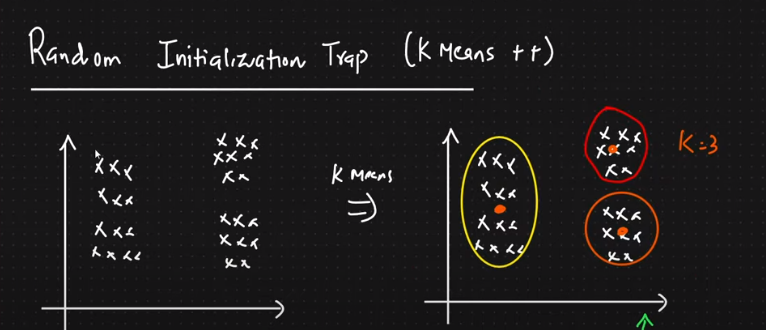

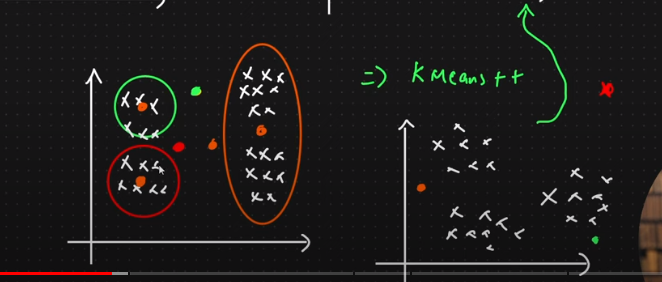

In [36]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
# fit_predict will give us cluster labels
y_labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
y_labels

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

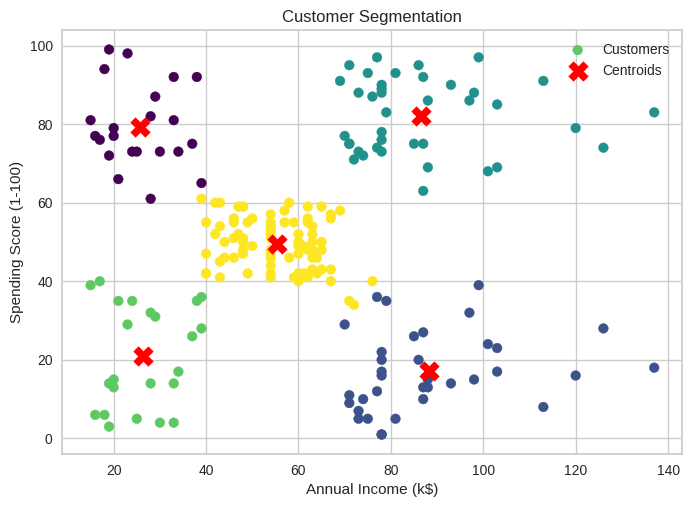

In [38]:
# Plot customer data points
plt.scatter(X[:, 0], X[:, 1], c=y_labels, cmap='viridis', label='Customers')  # Ensure 'cmap' provides distinct colors

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# **Silhouette Score**

* **Take any point & calculate the distance from that point to the other points**

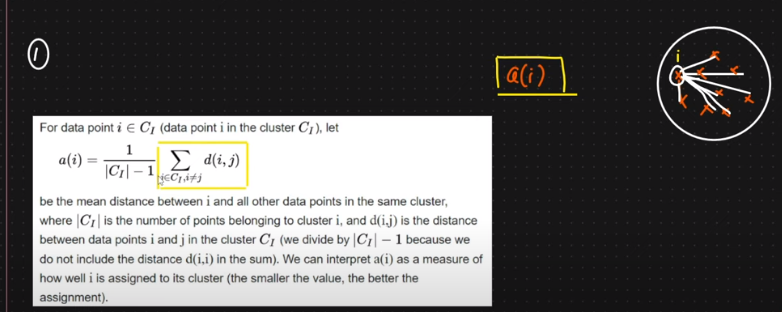

**We are using 2,11 because silhouette score calculation typically requires at least two clusters**

**Its values is between +1 to -1, more towards + more good the clustering is!**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

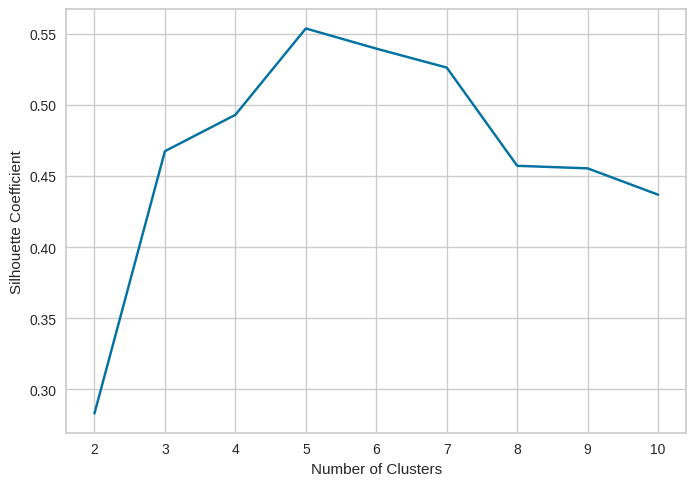

In [39]:
silhouette_coefficients = []
for k in range(2, 11):  # We start from 2 clusters, as silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

## Plotting silhouette score
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


**It indicates that value of k=5 is the best to go!**

**We can also Train-Test Split the dataset if we have some data with labels but some data is without labels.
see this to do it:**

https://www.youtube.com/watch?v=Aa4MACKaDC0&t=12s&ab_channel=KrishNaikHindi

# **Hierarchical Clustering**

**In this, no centroids**

**Two Types:**
* **Agglomerative**
* **Divisive**

* Initially, we will consider each point a seperate cluster
* Find the nearest points and create the new clusters
* Keep repeating STEP 2 until we get one major cluster

* **How many clusters? --> Use Dendrogram**



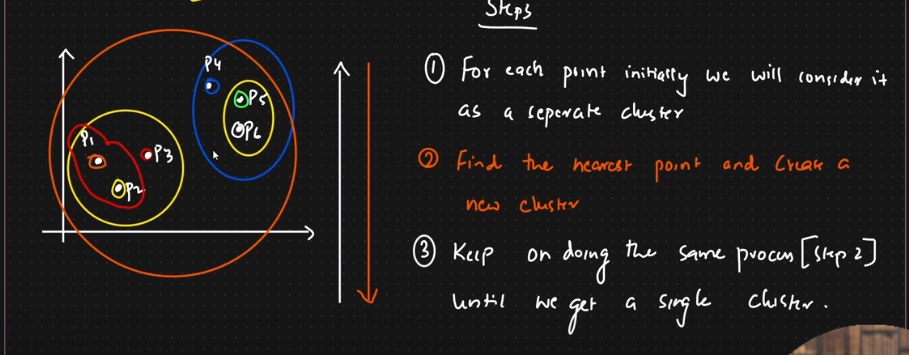

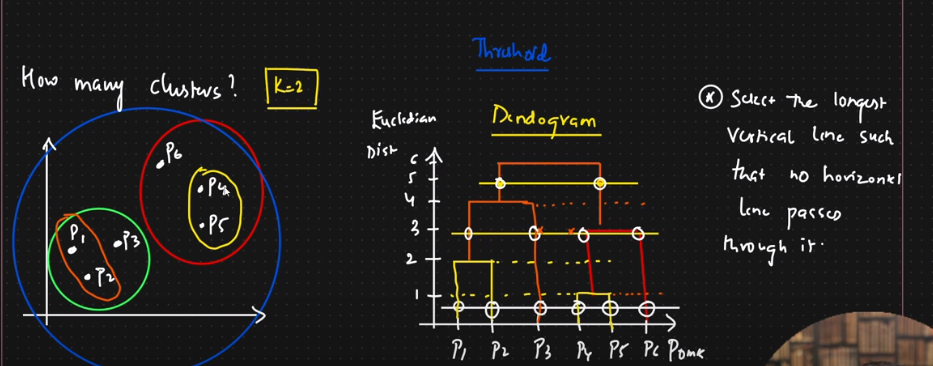

# **When to use KMeans VS Hierarchical:**

* **choose K-means clustering when you have a large dataset, a predefined number of clusters, and spherical clusters**

* **Choose hierarchical clustering for small to medium-sized datasets, exploratory analysis, when you don't know the number of clusters in advance, and when dealing with non-spherical clusters.**

# **Types of Hierarchical Clustering:**
* min(single link)
* max(compelte link)
* average
* ward


# **Single Linkage (Minimum Linkage):**

The distance between two clusters is defined as the shortest distance between any two points in the two clusters.

**Use Cases:** Single linkage tends to create long, elongated clusters. It is sensitive to **outliers** and noise, making it suitable for detecting elongated or irregularly shaped clusters. It can also be useful when dealing with non-globular clusters.

* when there is distance in clusters.

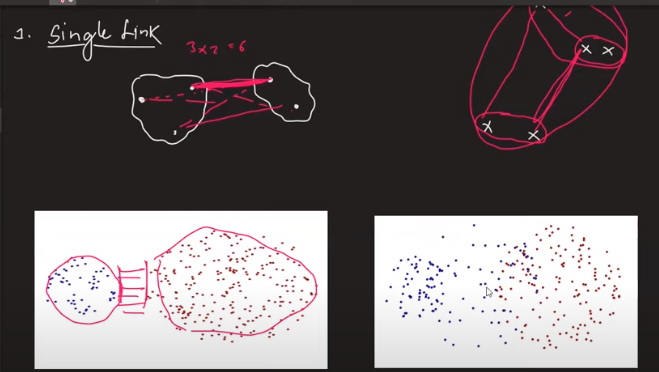

# **Complete Linkage (Maximum Linkage):**

The distance between two clusters is defined as the maximum distance between any two points in the two clusters.

**Use Cases:** Complete linkage tends to create compact, spherical clusters. It is less sensitive to **outliers** compared to single linkage, making it suitable for detecting compact, well-separated clusters. It can be useful when the goal is to identify tightly knit clusters.

**DOWNSIDE:**
* if one cluster is small and other is very large, the larger cluster can be torn.

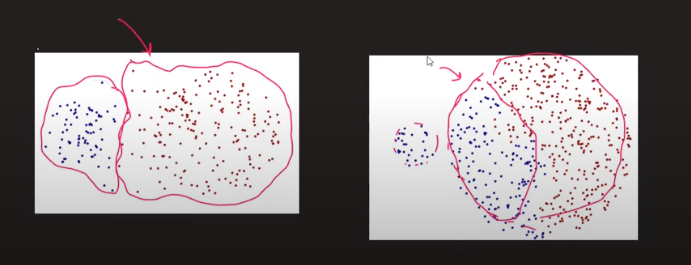

# **Average Linkage:**
The distance between two clusters is defined as the average distance between all pairs of points in the two clusters.

**Use Cases:** Average linkage strikes a **balance** between single and complete linkage. It tends to produce clusters of moderate compactness and can work well in many situations.
* It is a robust choice when the characteristics of the clusters are unknown or when there is no clear preference for single or complete linkage

# **Ward Linkage:**

Ward's method minimizes the variance when merging two clusters. It calculates the sum of squared differences within all clusters and the sum of squared differences between clusters.

**Use Cases:** Ward linkage is often used when the goal is to minimize the variance within each cluster. It tends to produce clusters of relatively equal size and compactness. It is suitable for datasets where **compact, equally sized clusters are desired.**

In [40]:
from sklearn import datasets

iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

**For Exploratory Data Analysis:** If you are using hierarchical clustering to understand the data structure and not to make predictions, it is fine to scale the entire dataset first as there is no risk of data leakage affecting future predictions.

**For Predictive Modeling:** If hierarchical clustering is part of a predictive model (e.g., using cluster labels as features in a prediction task), you should split the data first, then apply scaling. This way, you ensure that your model is validated properly under realistic conditions.

In [41]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris_data)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [42]:
X_scaled.shape

(150, 4)

# **We'll now try to apply the algo on more than 2 columns, thus we are using PCA to reduce the dimensions to 2**

In [43]:
## Apply the PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_scaled = pca.fit_transform(X_scaled)
pca_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

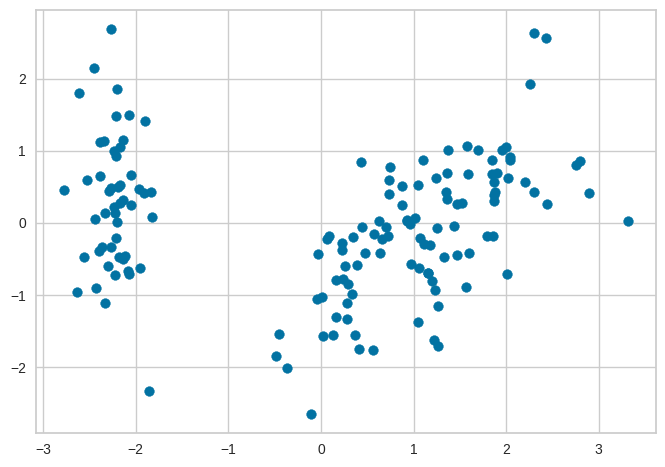

In [44]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1])

Text(0, 0.5, 'Eucledian Distance')

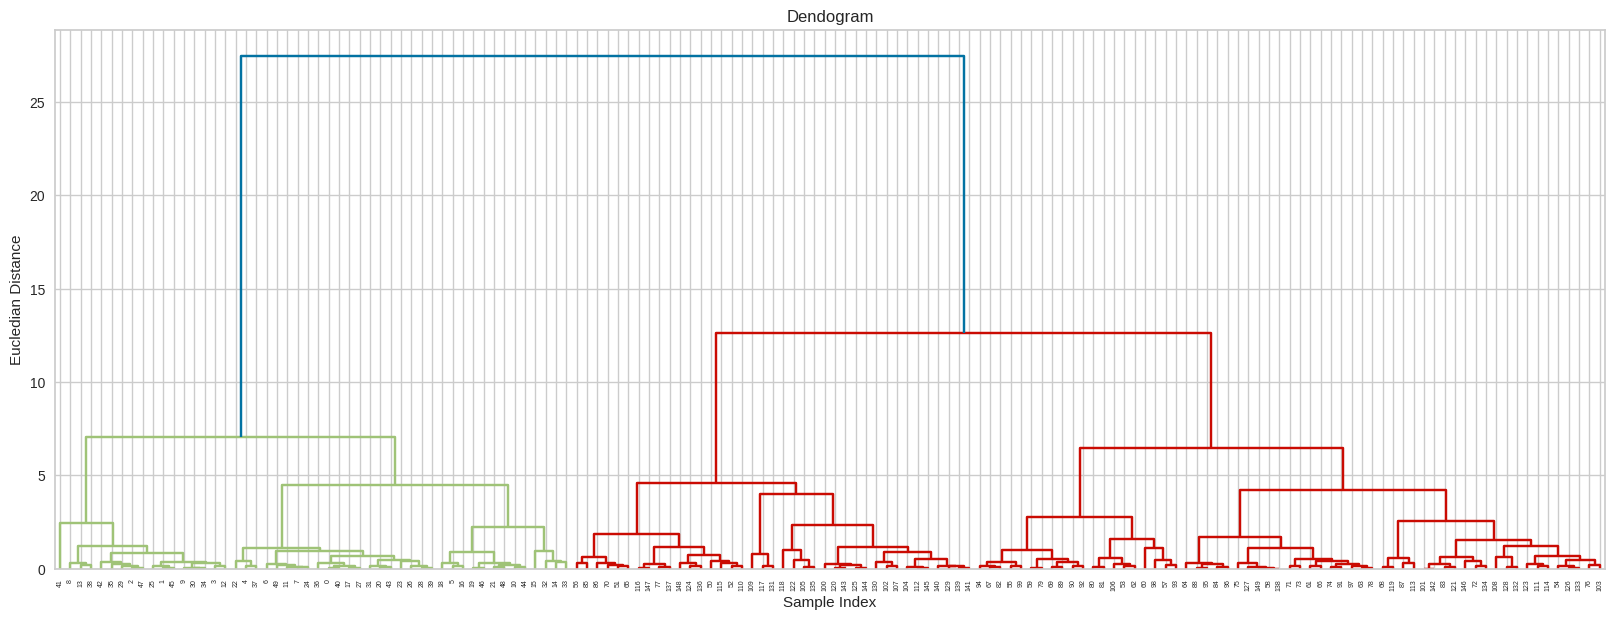

In [45]:
## AggLomerative Clustering
## To construct a dendogram
import scipy.cluster.hierarchy as sc

##plot the dendogram
plt.figure(figsize=(20, 7))
plt.title("Dendograms")

## create dendogram
# method = ward --> Eucledian Distance
sc.dendrogram(sc.linkage(pca_scaled, method= 'ward'))
plt.title( 'Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [46]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean' ,linkage= 'ward')
cluster.fit(pca_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [47]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

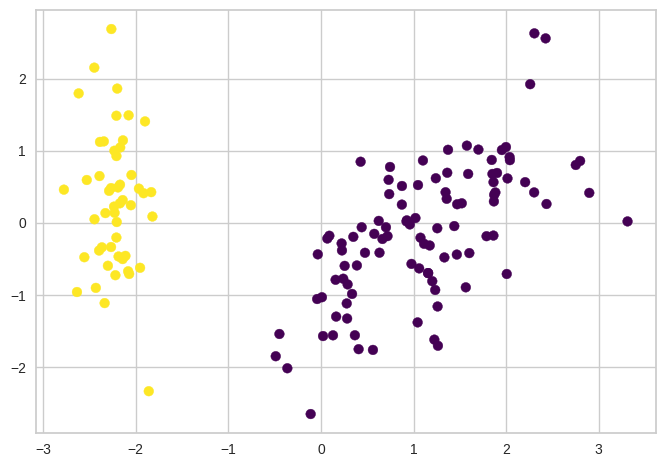

In [51]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=cluster.labels_, cmap='viridis')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

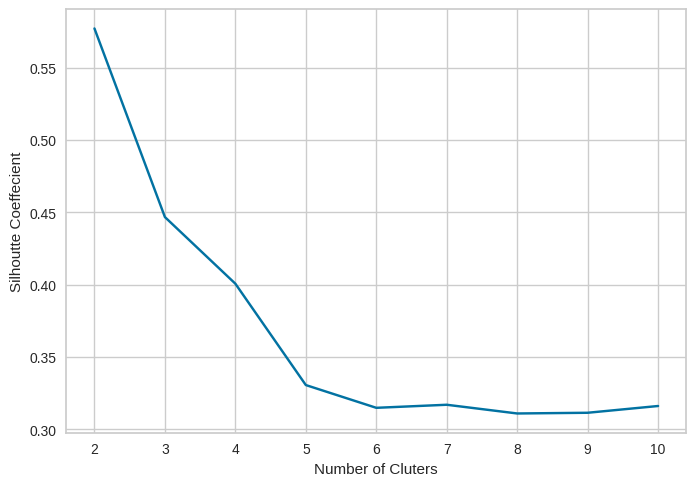

In [52]:
## silhouette score
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range (2, 11):
  agglo = AgglomerativeClustering(n_clusters=k,affinity='euclidean' ,linkage= 'ward')
  agglo.fit(X_scaled)
  score = silhouette_score(X_scaled, agglo.labels_)
  silhouette_coefficients.append(score)

## plotting silhouette score
plt. plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt. xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

**Silhoutte Score is max at 2, thus k=2**

# **Sample example of Hierarchical clutering using more than 2 features**

Optimal number of clusters: 4


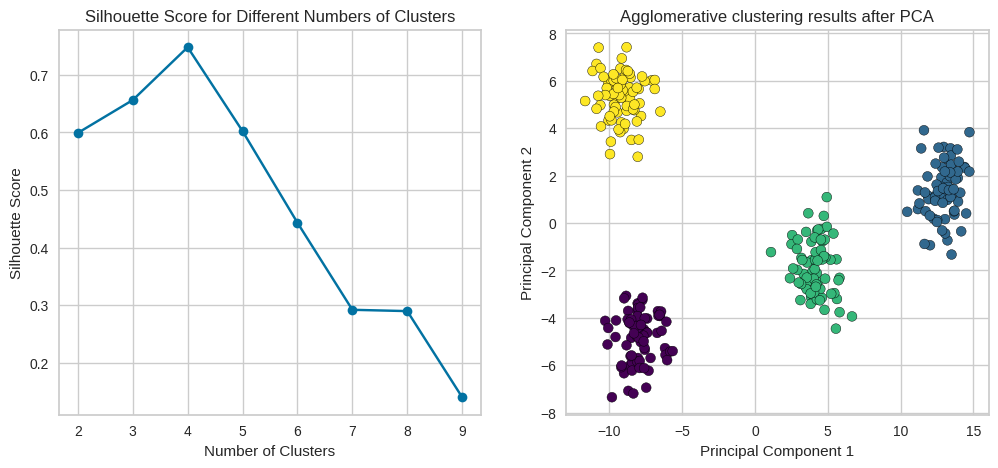

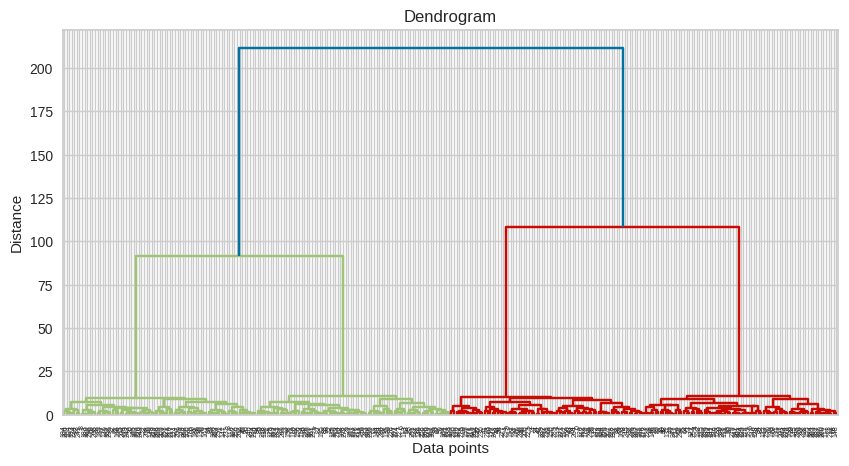

<Figure size 800x550 with 0 Axes>

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Generate synthetic dataset with 5 features
X, _ = make_blobs(n_samples=300, centers=4, n_features=5, random_state=42)

# Compute silhouette scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 10):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg_clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, agg_labels))

# Plot silhouette scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')

# Choose the number of clusters with the highest silhouette score
optimal_n_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because range starts from 2
print("Optimal number of clusters:", optimal_n_clusters)

# Perform agglomerative hierarchical clustering with the optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=optimal_n_clusters)
agg_labels = agg_clustering.fit_predict(X)

# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the clustering results in 2D after PCA
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, marker='o', edgecolor='black', s=50, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative clustering results after PCA')

# Plot dendrogram
linkage_matrix = linkage(X, method='ward', metric='euclidean')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

plt.tight_layout()
plt.show()


# **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

# **Why DBSCAN?**

* In KMeans, we have to specify number of clusters before hand.
* Sensitive to outliers, as it is centroid based clustering, and a few outliers can shift the centroids.
* In the last image, KMeans fails to clustre Non-Linear Data.

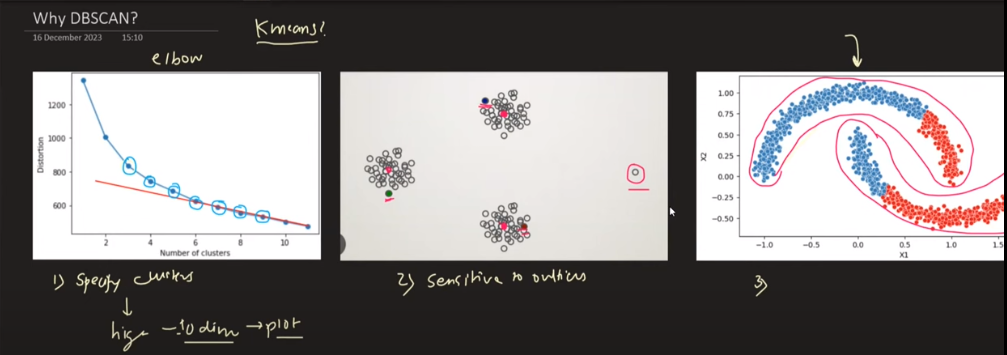

# **When To Use:**

**Handling Noise:** DBSCAN is excellent at separating high-density clusters from low-density regions, where the latter are treated as noise. This makes it highly suitable for applications like anomaly detection where outliers need to be identified and disregarded.

**Clusters of Arbitrary Shape:** Unlike k-means, which is limited to spherical clusters, DBSCAN can efficiently discover clusters of arbitrary shapes (Non-linear Clustering). This capability is useful in geographical data analysis, biology, and other fields where the data may naturally form complex shapes.

**Variable Cluster Density:** DBSCAN can find clusters even in data with varying density, thanks to its core concept of forming clusters based on dense regions. For example, in urban planning, different areas (like residential vs. commercial) might display distinctly different clustering densities.

**No Need to Specify Cluster Number:** DBSCAN does not require the number of clusters to be specified in advance, which is advantageous when the structure of the data is not known before analysis. This contrasts with algorithms like k-means, where the number of clusters needs to be predefined.

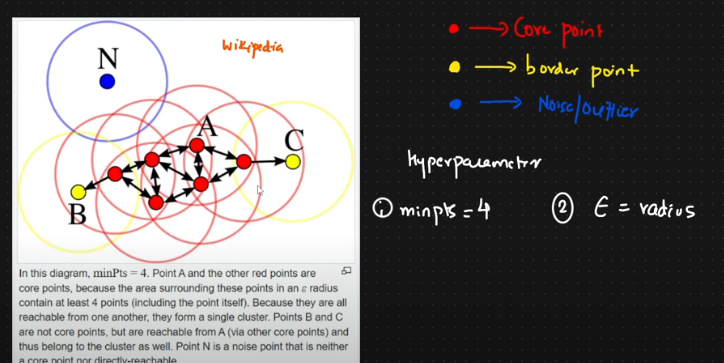

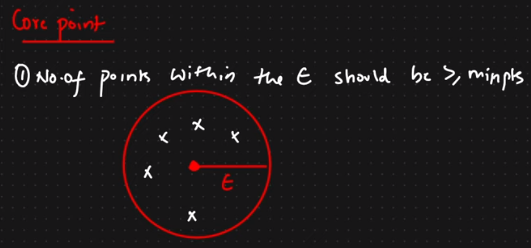

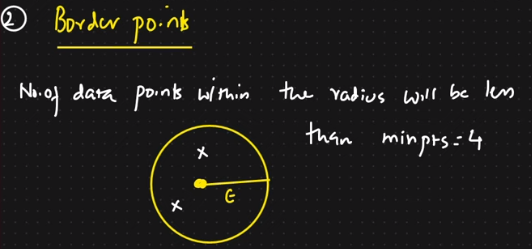

**If there is no point in that radius, its an Outlier**

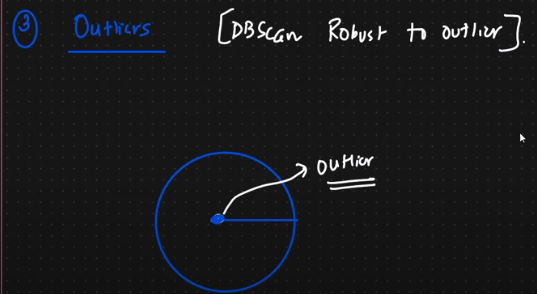

**It can be seen that how well DBSCAN is seperating the clusters, while K-means is struggling.**

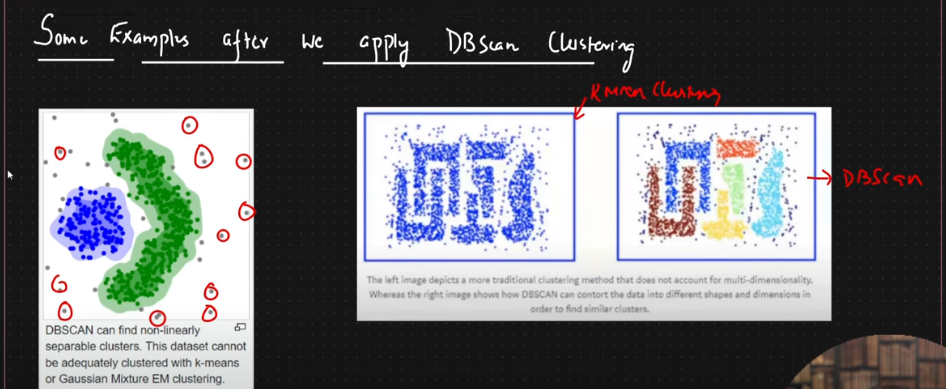

In [54]:
from sklearn.cluster import DBSCAN
from itertools import product
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In DBSCAN there are two major hyperparameters:

* eps
* min_samples

It is difficult arbitrarily to say what values will work the best. Therefore, I will first create a matrix of investigated combinations.

In [55]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [56]:
# Assuming df has the correct columns and you want to use specific features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [57]:
eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

Because DBSCAN creates clusters itself based on those two parameters let's check the number of generated clusters.

In [58]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))

A heatplot below shows how many clusters were generated by the DBSCAN algorithm for the respective parameters combinations.

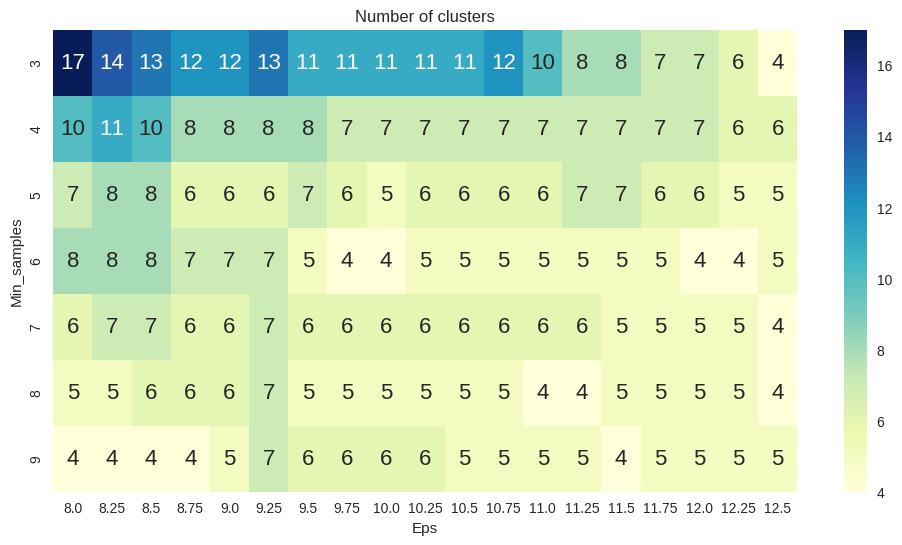

In [59]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

The heatplot above shows, the number of clusters vary from 17 to 4.To decide which combination to choose I will use a metric - a silhuette score and I will plot it as a heatmap again.

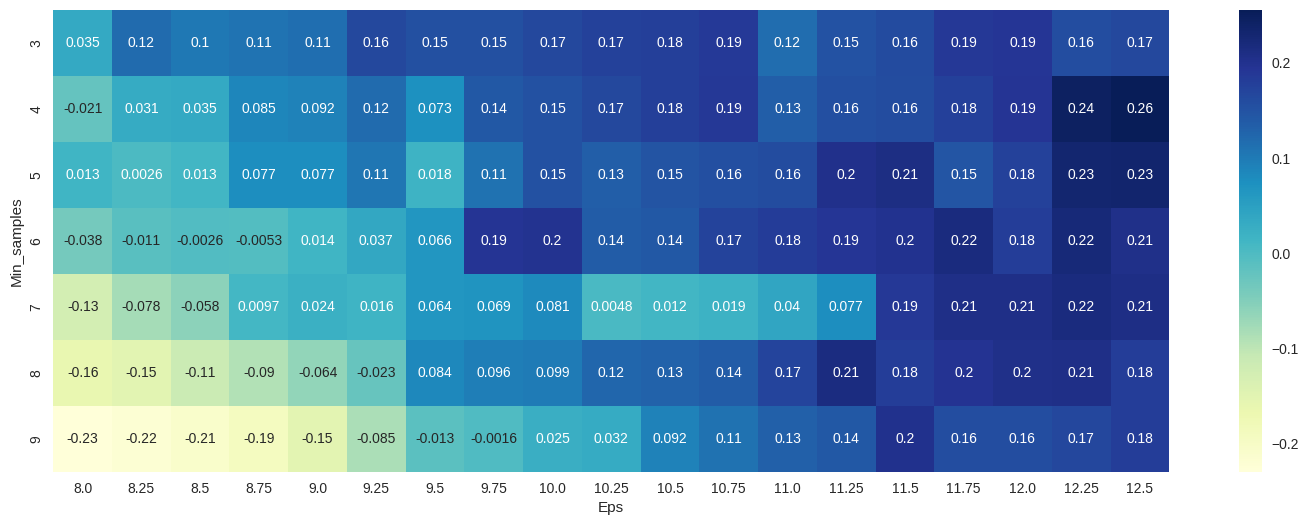

In [60]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global maximum is 0.26 for eps=12.5 and min_samples=4.

In [61]:
# Re-run the DBSCAN with updated X if needed
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X)
DBSCAN_clustered = pd.DataFrame(X)
DBSCAN_clustered['Cluster'] = DBS_clustering.labels_


Checking sizes of clusters.

In [62]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

DBSCAN_size
Cluster             
-1                18
 0               112
 1                 8
 2                34
 3                24
 4                 4

In [63]:
DBSCAN_clustered.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster'], dtype='object')

DBSCAN created 7 clusters plus outliers cluster (-1). Sizes of clusters 0-6 vary significantly - some have only 3 or 7 observations. There are 10 outliers.

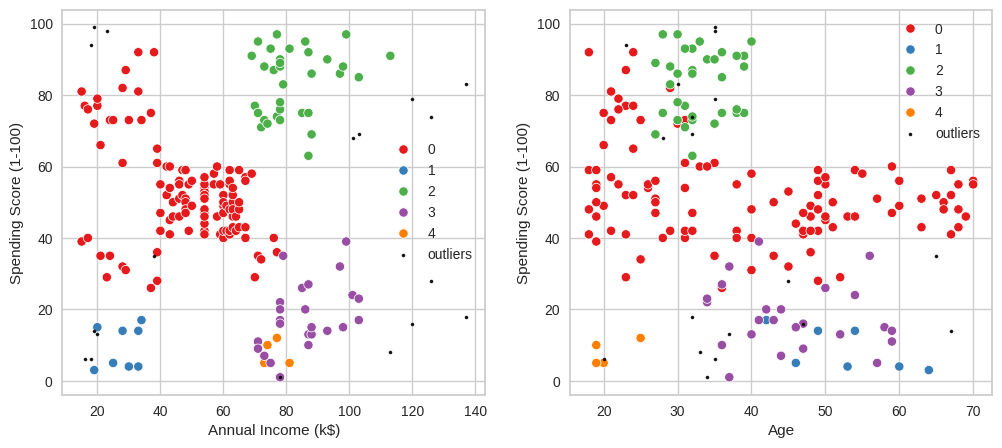

In [64]:
# Check and handle outliers
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster'] == -1]

# Setup plots
fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

# Correct the calls to sns.scatterplot by using keyword arguments for x and y
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

# Plot outliers
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")

# Add legends
axes[0].legend()
axes[1].legend()

# Adjust font size in legends
plt.setp(axes[0].get_legend().get_texts(), fontsize='10')  # Adjusting font size of legend texts
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

In [65]:
import plotly.express as px
import pandas as pd

# Assuming DBSCAN_clustered is prepared and includes 'Cluster' column

# Handle outliers by distinguishing them in the 'Cluster' column for coloring
DBSCAN_clustered['Type'] = ['Outlier' if x == -1 else 'Clustered' for x in DBSCAN_clustered['Cluster']]

# Plotly Express to create the 3D scatter plot
fig = px.scatter_3d(DBSCAN_clustered,
                    x='Annual Income (k$)',
                    y='Age',
                    z='Spending Score (1-100)',
                    color='Cluster',  # Colors differentiate clusters
                    symbol='Type',  # Different symbols for Clustered data and Outliers
                    labels={'Cluster': 'Cluster ID'},
                    title='3D Visualization of DBSCAN Clustering')

# Update marker appearance
fig.update_traces(marker=dict(size=5, line=dict(width=2, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Add a bit more styling to enhance the plot
fig.update_layout(legend_title_text='Cluster ID',
                  scene=dict(
                      xaxis_title='Annual Income (k$)',
                      yaxis_title='Age',
                      zaxis_title='Spending Score (1-100)'),
                  margin=dict(l=0, r=0, b=0, t=30))

# Show plot
fig.show()